# Amazon Stock Prediction

In [163]:
# panda technical analysis
!pip install pandas_ta -q

In [164]:
!pip install mplfinance -q

In [165]:
!pip install yfinance

### Importing Necessary Libraries


In [166]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mplfinance as mpf #matplotlib finance

import seaborn as sns
import yfinance as yf
import pandas_ta as ta # for technical analysis

from keras.models import Sequential
from keras.layers import *

import warnings
warnings.filterwarnings("ignore") 

### Downloading StockPrice Using yfinance

In [167]:
df = yf.download(tickers = 'AMZN', start = '2019-02-20',end = '2024-02-20')
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-02-20,81.500000,81.746498,80.505997,81.105003,81.105003,66752000
2019-02-21,80.992500,81.178001,80.045502,80.972000,80.972000,69668000
2019-02-22,81.175003,81.747002,81.058502,81.578003,81.578003,61924000
2019-02-25,82.072502,82.730003,81.519501,81.650002,81.650002,63690000
2019-02-26,81.299004,81.999496,80.806503,81.820000,81.820000,53316000
...,...,...,...,...,...,...
2024-02-12,174.800003,175.389999,171.539993,172.339996,172.339996,51050400
2024-02-13,167.729996,170.949997,165.750000,168.639999,168.639999,56345100
2024-02-14,169.210007,171.210007,168.279999,170.979996,170.979996,42815500


### Visualising Stocks


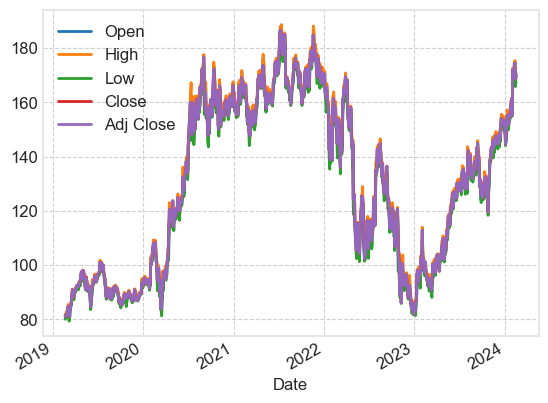

In [168]:
df.iloc[:,:-1].plot()
plt.show()


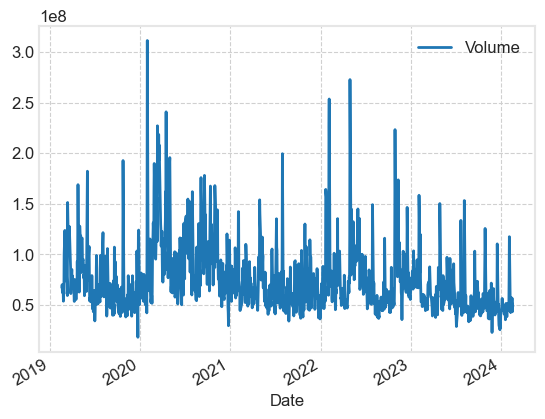

In [169]:
df.iloc[:,-1].plot()
plt.legend()
plt.show()

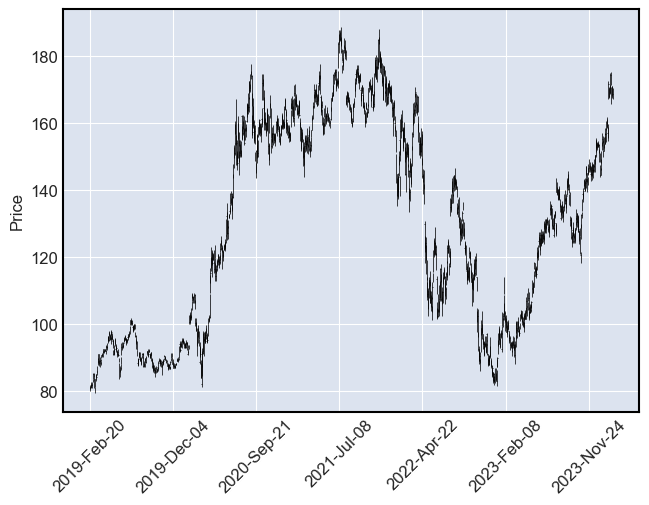

In [170]:
mpf.plot(df)

In [171]:
# This data is so big so we draw more chart like =candle etc.

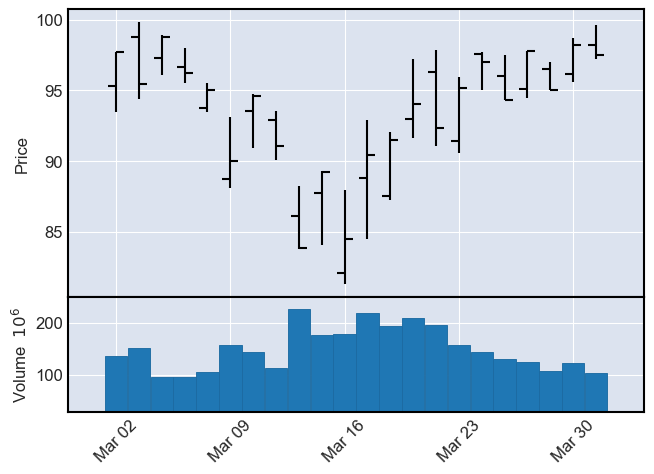

In [172]:
# OHLC Chart (Open,High,Low,Close data )

mpf.plot(df['2020-03'], volume = True)

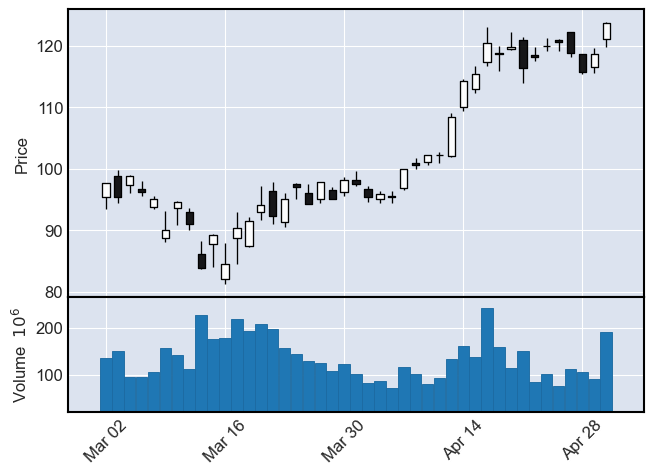

In [173]:
# Candle Stick Chart for March 2020

mpf.plot(df['2020-03':'2020-04'],type ='candle', volume = True)

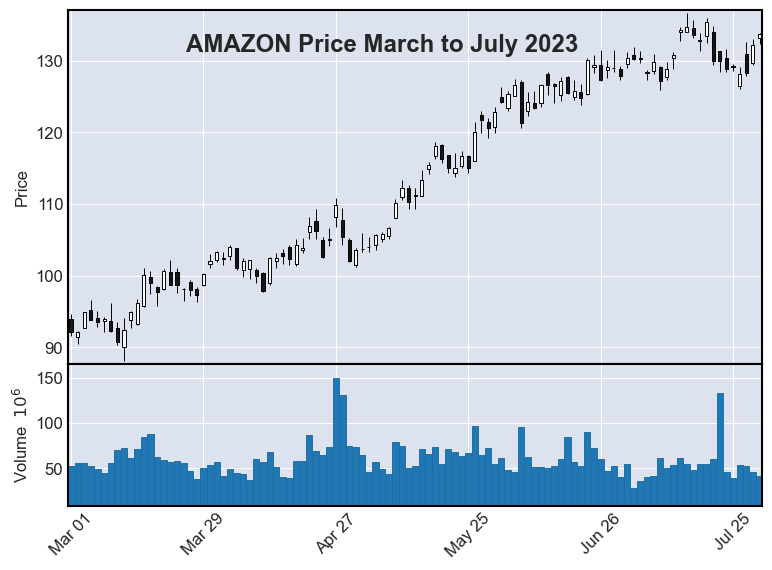

In [174]:
 mpf.plot(df['2023-03':'2023-07'], type='candle',
 title= 'AMAZON Price March to July 2023',
 volume = True, tight_layout = True)

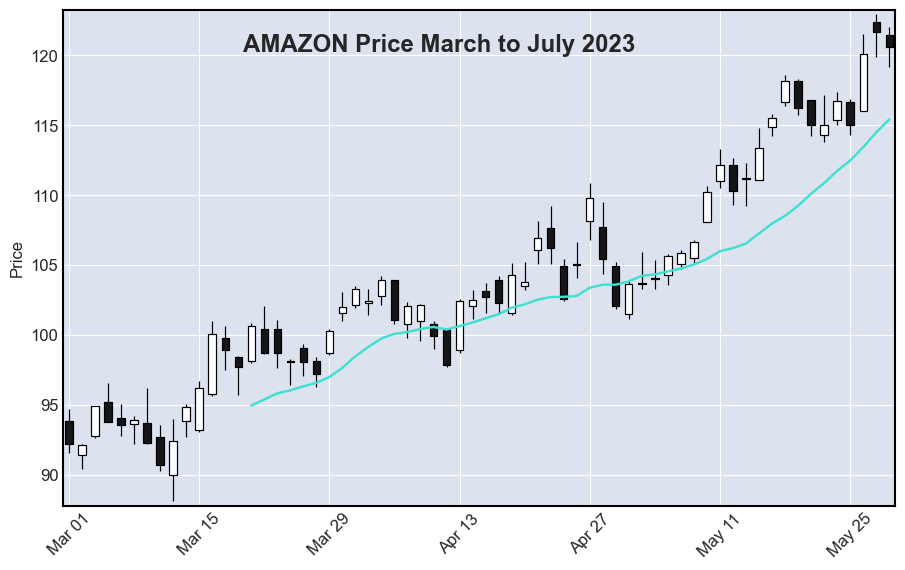

In [175]:
 mpf.plot(df['2023-03':'2023-05'], figratio=(20,12),
 type='candle', title= 'AMAZON Price March to July 2023',
 mav=15, tight_layout = True)

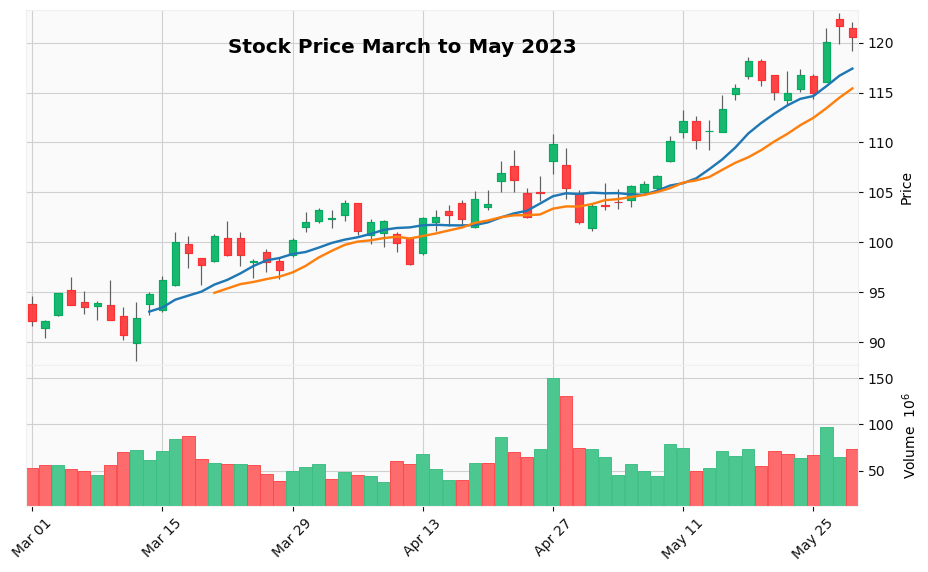

In [176]:
mpf.plot(df['2023-03':'2023-05'],
 figratio=(10,6), type='candle',
 title= 'Stock Price March to May 2023',
 mav=(10,15),
 #ema=(10),
 volume = True,
 tight_layout = True, style ='yahoo',
 )

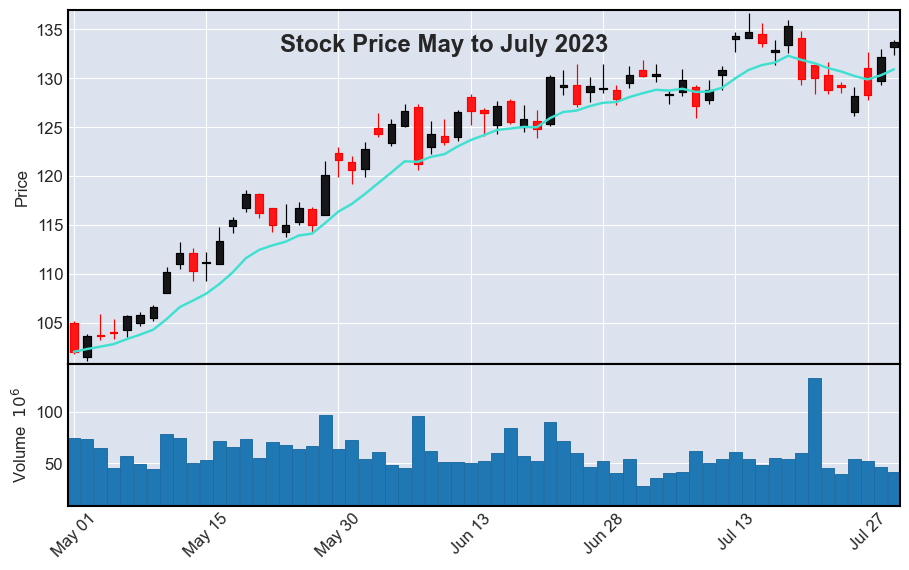

In [177]:
 mpf.plot(df['2023-05':'2023-07'],
 figratio=(10,6), type='candle',
 title= 'Stock Price May to July 2023',
 #mav=(10,15),
 ema=(10),
 volume = True,
 tight_layout = True, style ='kenan',
 )

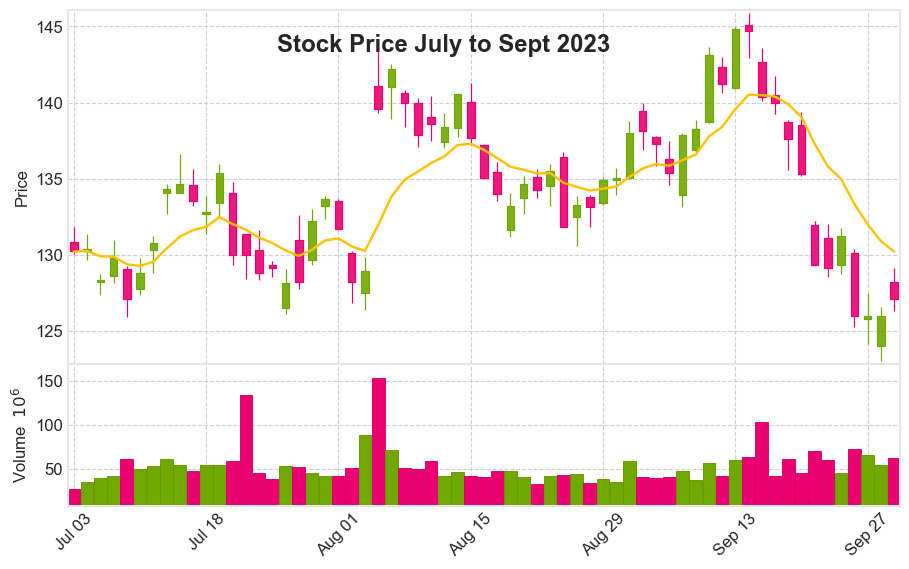

In [178]:
mpf.plot(df['2023-07':'2023-09'],
 figratio=(10,6), type='candle',
 title= 'Stock Price July to Sept 2023',
 ema=(10),
 volume = True,
 tight_layout = True, style ='binance',
 )

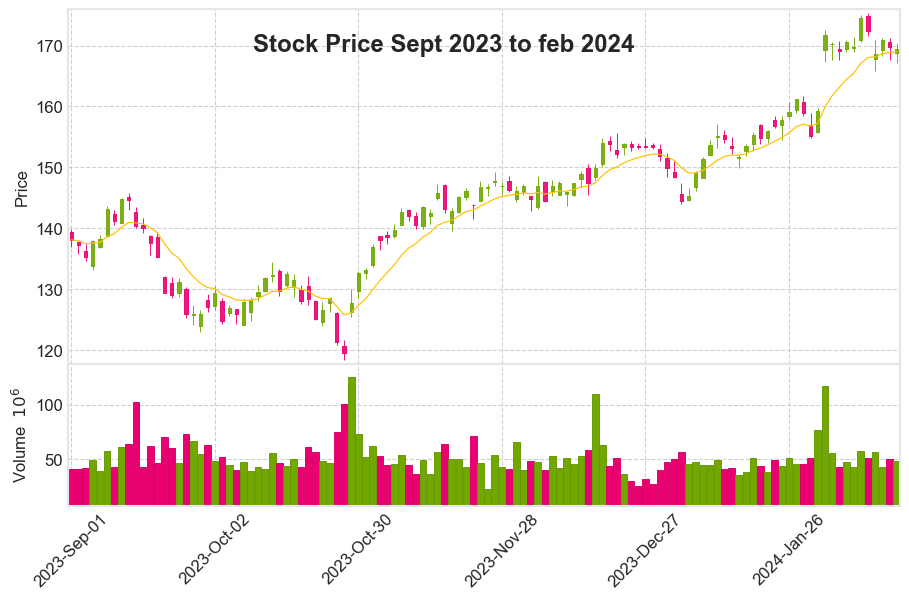

In [179]:
mpf.plot(df['2023-09':'2024-02'],
 figratio=(10,6), type='candle',
 title= 'Stock Price Sept 2023 to feb 2024',
 #mav=(10,15),
 ema=(10),
 volume = True,
 tight_layout = True, style ='binance',
 )

### Adding some Technical Indicator to the data
#### Relative Strength Index (RSI): Measures the speed and change of price movements, indicating
#### overbought or oversold conditions.
######                                            RSI = 100 −(100/1+(avg gain/avg loss))

#### Readings below 30 generally indicate that the stock is oversold, while readings above 70 indicate that it is
#### overbought.

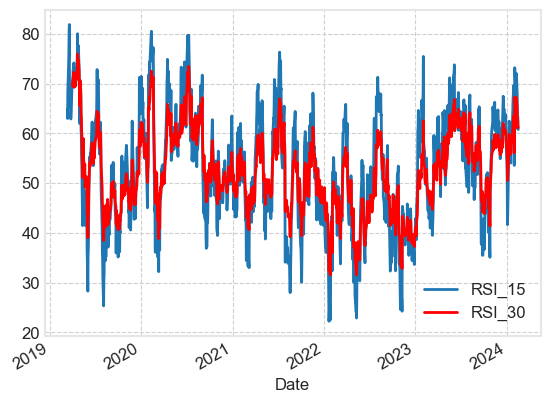

In [180]:
#calculates the RSI with a lookback period of 15.
RSI_15 =ta.rsi(df.Close, length=15)
RSI_30 =ta.rsi(df.Close, length=30)
RSI_15.plot()
RSI_30.plot(color ='red')
plt.legend()
plt.show()


In [181]:
df['RSI'] =ta.rsi(df.Close, length=15)

In [182]:
# mpf.plot(df['2023-09':'2023-10'], type='candle', style='yahoo',
#  title= 'Stock Price and RSI from Sept to Nov 2023',
#  addplot=[mpf.make_addplot(df['RSI']['2023-09':'2023-10'], panel=1, secondary_y=
#  mpf.make_addplot([70] * len(df['2023-09':'2023-10']), panel=1, seconda
#  mpf.make_addplot([30] * len(df['2023-09':'2023-10']), panel=1, seconda
#  )


In [183]:
#calculates the EMA with a smoothing period of 20.
df['EMAF']= ta.ema(df.Close, length=20)


##### EMAM (Exponential Moving Average - Medium): This calculates another EMA for the 'Close' prices, but
###### with a longer time period compared to EMAF. It's often referred to as a medium-term EMA

In [184]:
#  calculates the EMA with a smoothing period of 100.
df['EMAM']=ta.ema(df.Close, length=100)

##### EMAM (Exponential Moving Average - Medium): This calculates another EMA for the 'Close' prices, but
###### with a longer time period compared to EMAF. It's often referred to as a medium-term EMA

In [185]:
# calculates the EMA with a smoothing period of 150.
df['EMAS']=ta.ema(df.Close, length=200)

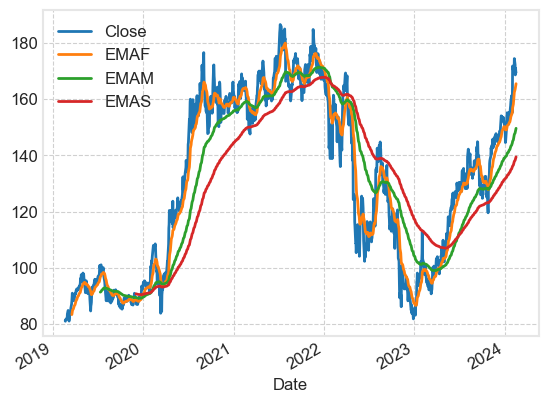

In [186]:
df['Close'].plot()
df['EMAF'].plot()
df['EMAM'].plot()
df['EMAS'].plot()
plt.legend()


#### Intraday Price Movement:
   The difference between the opening and adjusted closing prices provides insight into how much the price of
a financial instrument has moved within a single trading day. It gives you a sense of intraday volatility.

#### Market Sentiment:
   Positive values (df['Adj Close'] > df['Open']) suggest that the closing price was higher than the opening price, potentially indicating positive market sentiment or buying pressure during the day.Negative values (df['Adj Close'] < df['Open']) suggest that the closing price was lower than the opening price, potentially indicating negative market sentiment or selling pressure during the day.


In [187]:
df['Target'] = df['Adj Close']- df['Open']
df['Target'] = df['Target'].shift(-1)

#### Shifted Close Price:


In [188]:
df['TargetNextClose'] = df['Adj Close'].shift(-1)

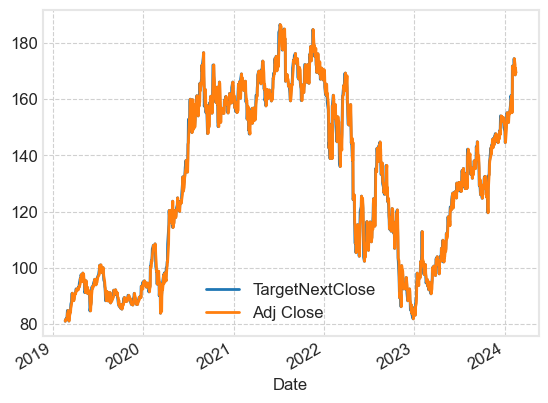

In [189]:
df['TargetNextClose'].plot()
df['Adj Close'].plot()
plt.legend()


<Axes: xlabel='Date'>

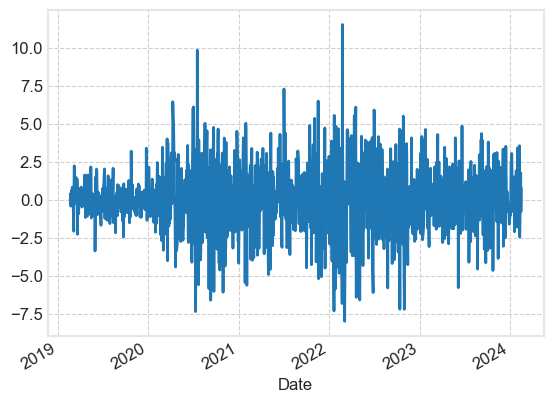

In [190]:
df['Target'].plot()


In [191]:
df['TargetClass'] = [1 if df.Target[i]>0 else 0 for i in range(len(df))]


###### Positive values (df['Adj Close'] > df['Open']) corresponds to TargetClass = 1
###### Negative values (df['Adj Close'] > df['Open']) corresponds to TargetClass = 0

<Axes: ylabel='TargetClass'>

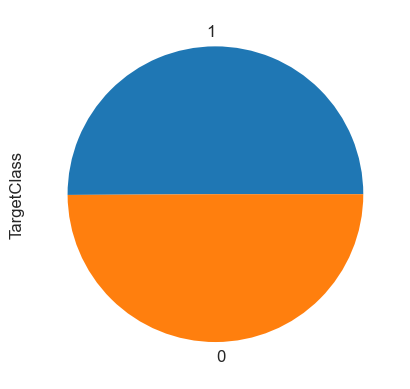

In [192]:
df['TargetClass'].value_counts().plot(kind='pie', )


In [193]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume,RSI,EMAF,EMAM,EMAS,Target,TargetNextClose,TargetClass
Date,,,,,,,,,,,,,
2024-02-12,174.800003,175.389999,171.539993,172.339996,172.339996,51050400,67.711141,163.424246,147.958513,138.232790,0.910004,168.639999,1
2024-02-13,167.729996,170.949997,165.750000,168.639999,168.639999,56345100,60.930942,163.920985,148.368047,138.535350,1.769989,170.979996,1
2024-02-14,169.210007,171.210007,168.279999,170.979996,170.979996,42815500,63.413397,164.593272,148.815809,138.858182,-0.779999,169.800003,0
2024-02-15,170.580002,171.169998,167.589996,169.800003,169.800003,49855200,61.308661,165.089151,149.231337,139.166061,0.769989,169.509995,1
2024-02-16,168.740005,170.419998,167.169998,169.509995,169.509995,48074600,60.777466,165.510184,149.632895,139.467991,NaN,NaN,0


### Components of TSA


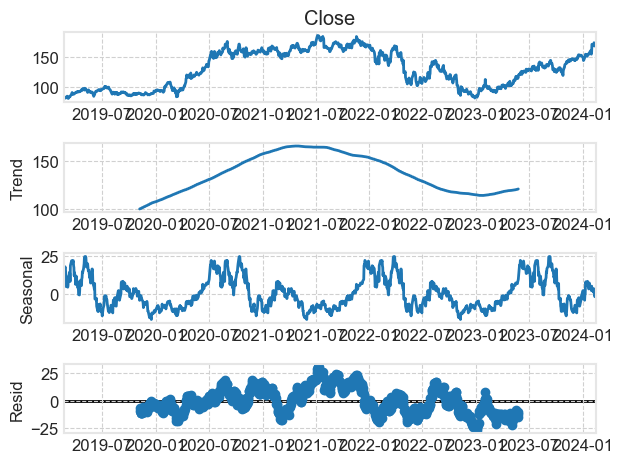

In [194]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose= seasonal_decompose(df.Close, period=365)
decompose.plot()
plt.show()


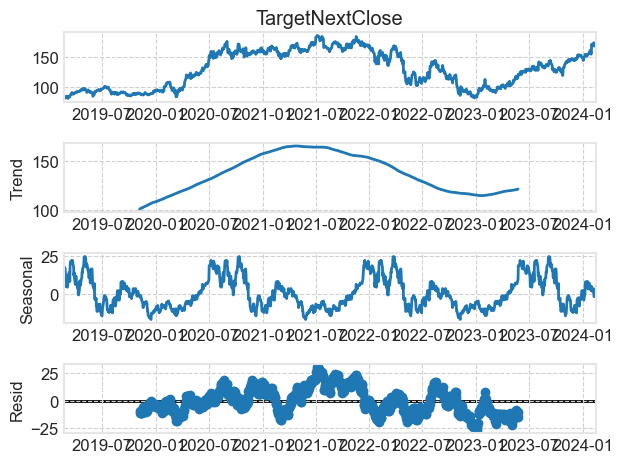

In [195]:
decompose= seasonal_decompose(df.TargetNextClose.dropna(), period=365)
decompose.plot()
plt.show()

### Augmented Dicker Fuller(ADFuller) Test for checking
### stationarity

In [196]:
from statsmodels.tsa.stattools import adfuller
def adfuller_prob(df,col):
    ts= df[col].dropna()
    ts_prob = adfuller(ts)[1]
    print(f'Probability is {ts_prob}')
    if ts_prob < 0.05:
        print('TS is stationary')
    else:
        print(f'TS = {col} is non-stationary')
    ts1 = df[col].diff().dropna()
    ts1_prob = adfuller(ts1)[1]
    print(f'Probability of 1st difference is {ts1_prob}')
    if ts1_prob < 0.05:
        print(f'TS{col} of diff1 is stationary')
adfuller_prob(df, col='Close')


Probability is 0.3925674159095635
TS = Close is non-stationary
Probability of 1st difference is 0.0
TSClose of diff1 is stationary


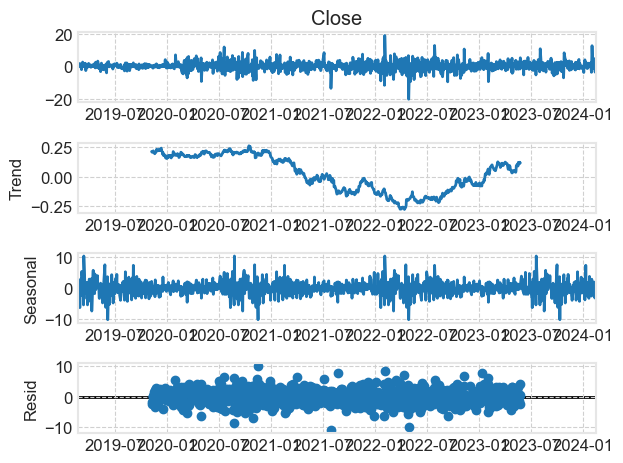

In [197]:
seasonal_decompose(df.Close.diff().dropna(), period=365).plot()
plt.show()

In [198]:
adfuller_prob(df, col='Target')


Probability is 0.0
TS is stationary
Probability of 1st difference is 2.1077467131891393e-25
TSTarget of diff1 is stationary


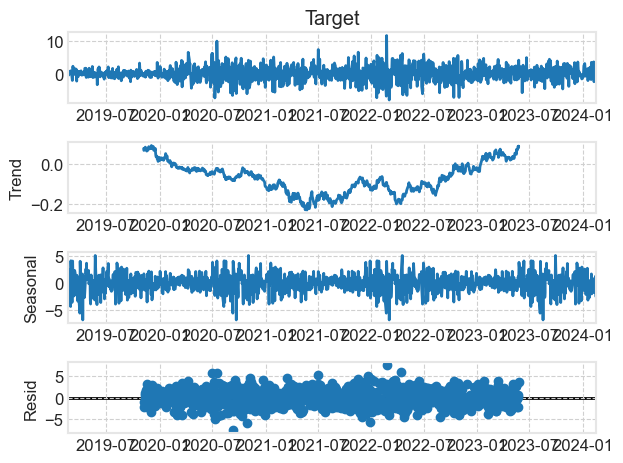

In [199]:
seasonal_decompose(df.Target.dropna(), period=365).plot()
plt.show()

In [200]:
df1 = df.dropna(inplace= True)
df1= df.reset_index()
df1= df1.drop(['Volume','Close'],axis=1)
pd.set_option('display.max_columns', None)
df1.head()

,Date,Open,High,Low,Adj Close,RSI,EMAF,EMAM,EMAS,Target,TargetNextClose,TargetClass
0,2019-12-03,88.000000,88.643501,87.361504,88.498001,49.328594,88.679262,89.441348,90.749235,-0.666000,88.034500,0
1,2019-12-04,88.700500,89.454498,88.011002,88.034500,47.140488,88.617856,89.413490,90.722223,-1.151001,87.024002,0
2,2019-12-05,88.175003,88.175003,87.000000,87.024002,42.714658,88.466060,89.366174,90.685424,0.020004,87.580002,1
3,2019-12-06,87.559998,87.720001,87.006500,87.580002,45.719009,88.381674,89.330804,90.654525,-0.057495,87.475502,0
4,2019-12-09,87.532997,88.344498,87.280502,87.475502,45.241210,88.295372,89.294065,90.622893,-0.409500,86.960503,0


In [201]:
df1.Date.tail(1)

1057   2024-02-15
Name: Date, dtype: datetime64[ns]

In [202]:
last_date = df1.Date.tail(1).values
print('Last Date =', last_date)

Last Date = ['2024-02-15T00:00:00.000000000']


In [203]:
df1.shape

(1058, 12)

In [204]:
# excluding date and target_class
final_df = df1.iloc[:,1:-1]
final_df.head()

,Open,High,Low,Adj Close,RSI,EMAF,EMAM,EMAS,Target,TargetNextClose
0,88.000000,88.643501,87.361504,88.498001,49.328594,88.679262,89.441348,90.749235,-0.666000,88.034500
1,88.700500,89.454498,88.011002,88.034500,47.140488,88.617856,89.413490,90.722223,-1.151001,87.024002
2,88.175003,88.175003,87.000000,87.024002,42.714658,88.466060,89.366174,90.685424,0.020004,87.580002
3,87.559998,87.720001,87.006500,87.580002,45.719009,88.381674,89.330804,90.654525,-0.057495,87.475502
4,87.532997,88.344498,87.280502,87.475502,45.241210,88.295372,89.294065,90.622893,-0.409500,86.960503


### Splitting Data into train and test


In [205]:
# split data into train test sets
splitlimit = int(len(final_df)*0.8)
print('split limit :', splitlimit)
train_data, test_data = final_df[:splitlimit], final_df[splitlimit:]
print('Shape of train', train_data.shape )
print('Shape of test', test_data.shape )

split limit : 846
Shape of train (846, 10)
Shape of test (212, 10)


### Sacling the Data
Scaling is important when working with Long Short-Term Memory (LSTM) networks for predicting stock
prices or any time series data. LSTMs are a type of recurrent neural network (RNN) that are well-suited for
sequential data like stock prices.
Activation Functions: LSTMs use activation functions, such as the hyperbolic tangent (tanh) or sigmoid
functions, within their layers. These functions are sensitive to the scale of the input data. If the input data
have vastly different scales, the network may have difficulty learning effectively.


In [206]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc_train = sc.fit_transform(train_data)
sc_test = sc.transform(test_data)
print('==='*25)
print('Scaled Trained data')
print('==='*25)
print(sc_train)
print('==='*25)
print('Scaled Test data')
print('==='*25)
print(sc_test)
print('==='*25)

Scaled Trained data
[[-1.63855855 -1.6727298  -1.6064974  ... -1.79718138 -0.24031415
  -1.64346467]
 [-1.61537854 -1.64595977 -1.58485825 ... -1.79826636 -0.43440057
  -1.67705936]
 [-1.63276758 -1.68819436 -1.61854152 ... -1.7997444   0.03420959
  -1.65857477]
 ...
 [-1.21499831 -1.26485669 -1.21840756 ... -1.121397   -1.00225219
  -1.31780659]
 [-1.22823461 -1.28103093 -1.26171941 ... -1.12529131  1.40681917
  -1.16587386]
 [-1.27621618 -1.2130329  -1.22840268 ... -1.12732042  0.20228349
  -1.16221682]]
Scaled Test data
[[-1.17297331 -1.19223745 -1.14844249 ... -1.12928538 -0.14187262
  -1.15457045]
 [-1.13690438 -1.17474258 -1.1324506  ... -1.13113886 -0.6340864
  -1.16919838]
 [-1.110763   -1.15922865 -1.13478276 ... -1.13314975  1.11468812
  -1.10270703]
 ...
 [ 0.99975772  1.04410829  1.00515069 ...  0.12219587  0.73451443
   1.11411442]
 [ 1.04873222  1.0526909   1.08944196 ...  0.13516275 -0.28593377
   1.07488477]
 [ 1.09406623  1.05137026  1.06645334 ...  0.14752901  0.33433

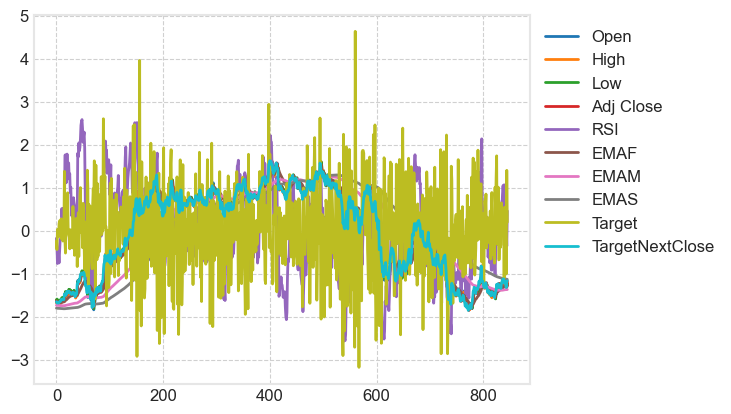

In [207]:
sc_train_df = pd.DataFrame(sc_train, columns = list(final_df))
sc_test_df = pd.DataFrame(sc_test, columns = list(final_df))
sc_train_df.plot()
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

## Predicting "TargetNextClose"


In [208]:
def x_y_split(df, n_target, n_past=14):
    x = np.array([df.iloc[i-n_past:i,:8].copy() for i in range(n_past,len(df))])
    yi = np.array(df.iloc[n_past:,n_target])
    y=np.reshape(yi,(len(yi),1))
    return x,y
x_train, y_train = x_y_split(sc_train_df , -1, 14) # -1 is for last column of the datas
x_test, y_test = x_y_split(sc_test_df ,n_target= -1, n_past=14)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((832, 14, 8), (198, 14, 8), (832, 1), (198, 1))

## Model

In [209]:
model =Sequential([
 LSTM(150, activation ='relu', input_shape = (x_train.shape[1],x_train.shape[2]),return_sequences=True),
 LSTM(32, activation ='relu', return_sequences = False),
 Dense(64, activation ='relu'),
 Dense(32, activation ='relu'),
 Dropout(0.3),
 Dense(y_train.shape[1], activation ='linear')
      ])
model.compile(optimizer ='adam', loss ='mse')
model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_11 (LSTM)              (None, 14, 150)           95400     
                                                                 
 lstm_12 (LSTM)              (None, 32)                23424     
                                                                 
 dense_12 (Dense)            (None, 64)                2112      
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 dropout_4 (Dropout)         (None, 32)                0         
                                                                 
 dense_14 (Dense)            (None, 1)                 33        
                                                                 
Total params: 123049 (480.66 KB)
Trainable params: 123

In [210]:
history = model.fit(x_train, y_train, epochs=20, batch_size=64, validation_split=0.1)


Epoch 1/20

12/12 [==============================] - 7s 126ms/step - loss: 0.4404 - val_loss: 0.1449
Epoch 2/20
12/12 [==============================] - 1s 41ms/step - loss: 0.1924 - val_loss: 0.1108
Epoch 3/20
12/12 [==============================] - 0s 41ms/step - loss: 0.1226 - val_loss: 0.0514
Epoch 4/20
12/12 [==============================] - 0s 40ms/step - loss: 0.1070 - val_loss: 0.0294
Epoch 5/20
12/12 [==============================] - 1s 46ms/step - loss: 0.1054 - val_loss: 0.0239
Epoch 6/20
12/12 [==============================] - 1s 45ms/step - loss: 0.0974 - val_loss: 0.0297
Epoch 7/20
12/12 [==============================] - 0s 40ms/step - loss: 0.0867 - val_loss: 0.0296
Epoch 8/20
12/12 [==============================] - 0s 39ms/step - loss: 0.0894 - val_loss: 0.0247
Epoch 9/20
12/12 [==============================] - 0s 41ms/step - loss: 0.0911 - val_loss: 0.0168
Epoch 10/20
12/12 [==============================] - 0s 40ms/step - loss: 0.0832 - val_loss: 0.0448
Epoch 1

<Axes: >

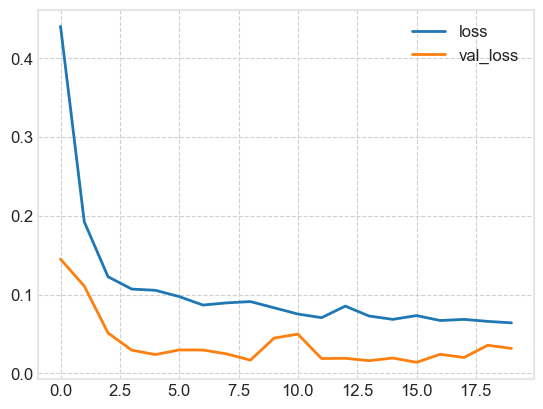

In [211]:
losses = pd.DataFrame(model.history.history)
losses.plot()


7/7 [==============================] - 1s 15ms/step
[-0.94325864] [-1.05749289]
[-0.9474815] [-1.05184118]
[-0.9330242] [-1.02557707]
[-0.917634] [-0.90689001]
[-0.89513236] [-0.84073119]
[-0.84252757] [-0.90456283]
[-0.7772074] [-0.87331206]
[-0.75510895] [-0.80017142]
[-0.73495257] [-0.73035555]
[-0.69615364] [-0.64225446]


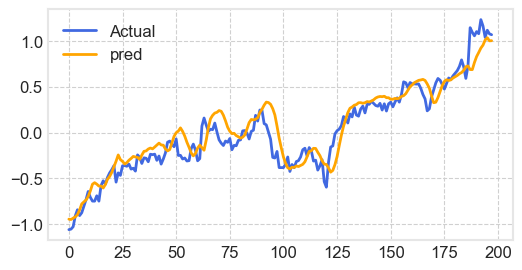

In [212]:
y_pred = model.predict(x_test)
for i in range(10):
 print(y_pred[i], y_test[i])
plt.figure(figsize=(6,3))
plt.plot(y_test, color = 'royalblue', label = 'Actual')
plt.plot(y_pred, color = 'orange', label = 'pred')
plt.legend()
plt.show()